In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.jaywalk_gym.jaywalk_env import EnvParams, JaywalkEnv


easy_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
)
easy_env = JaywalkEnv(easy_params)

In [3]:
medium_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=3,
    max_vehicles=30,
    p_vehicle_spawn=0.8,
    p_vehicle_stop=0.5,
)
medium_env = JaywalkEnv(medium_params)

In [4]:
hard_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=4,
    max_vehicles=50,
    p_vehicle_spawn=0.9,
    p_vehicle_stop=0.3,
)
hard_env = JaywalkEnv(hard_params)

Evaluating easy
Agent's state has been loaded from ../../checkpoints/final_dqn/easy.pt


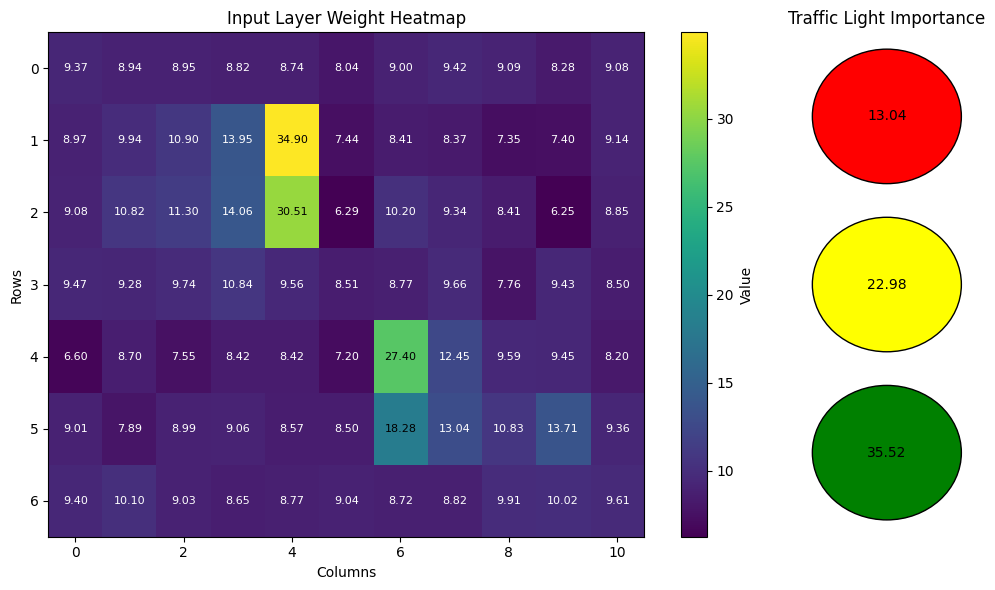

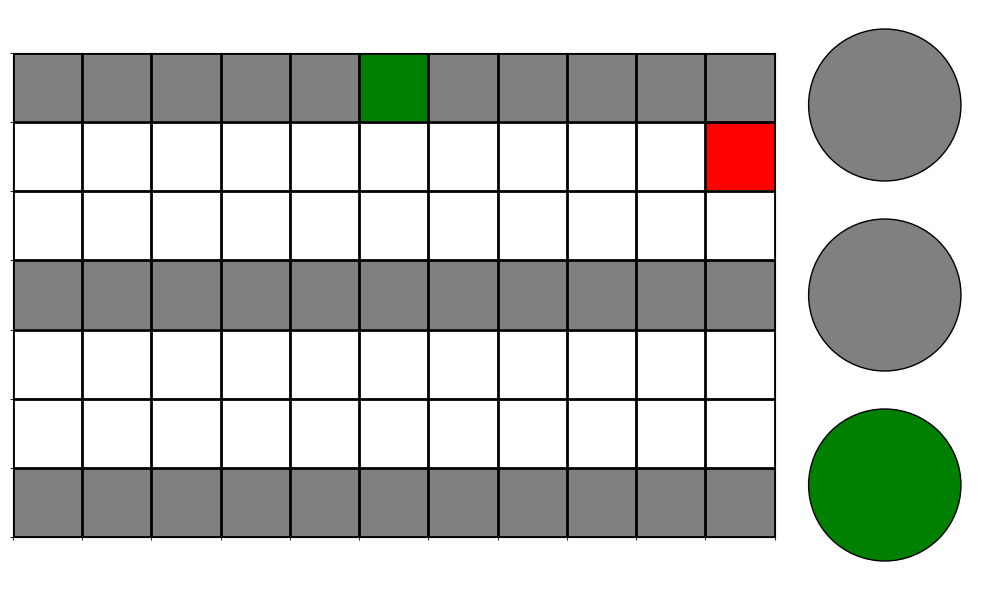

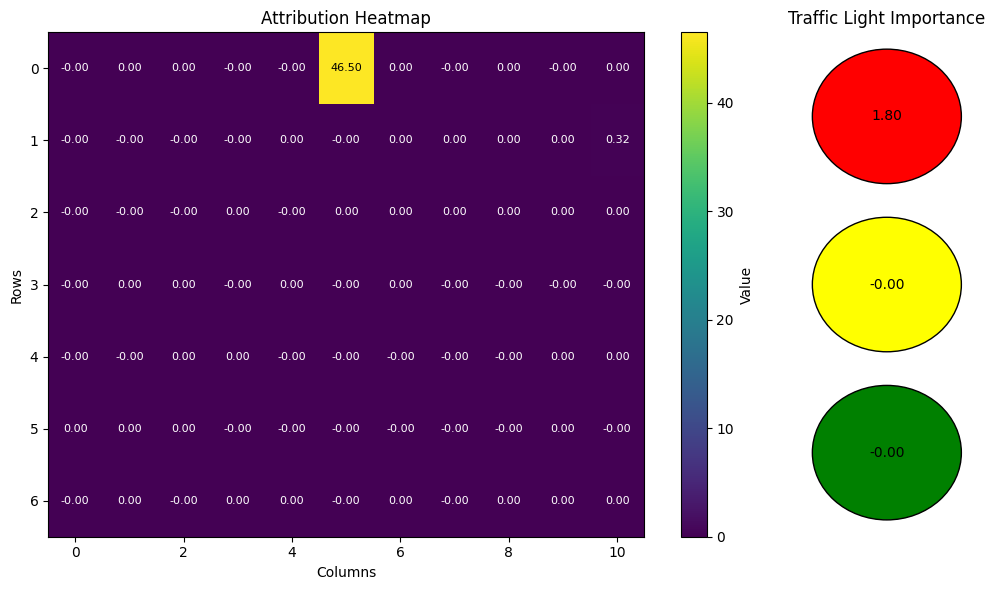

Evaluating medium
Agent's state has been loaded from ../../checkpoints/final_dqn/medium.pt


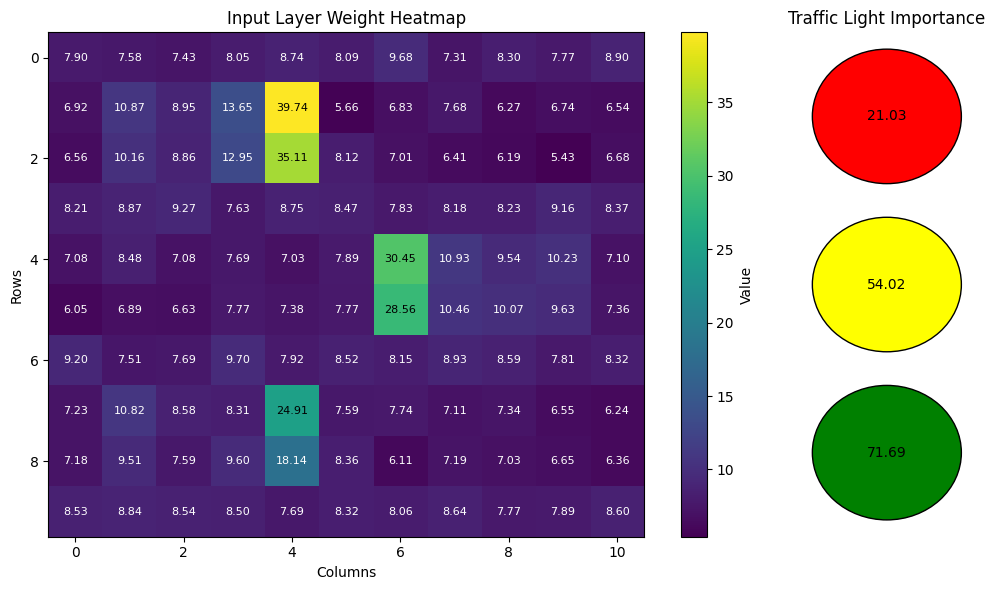

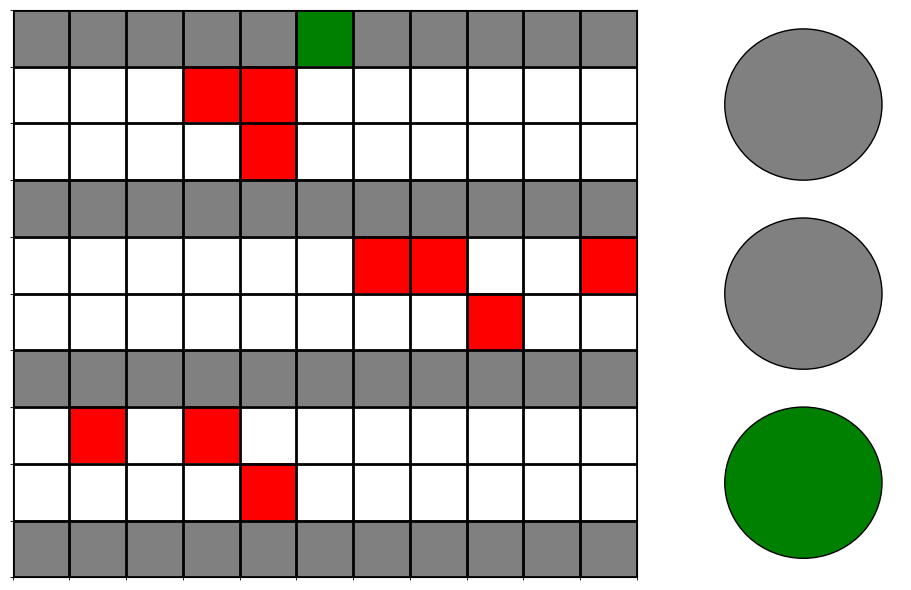

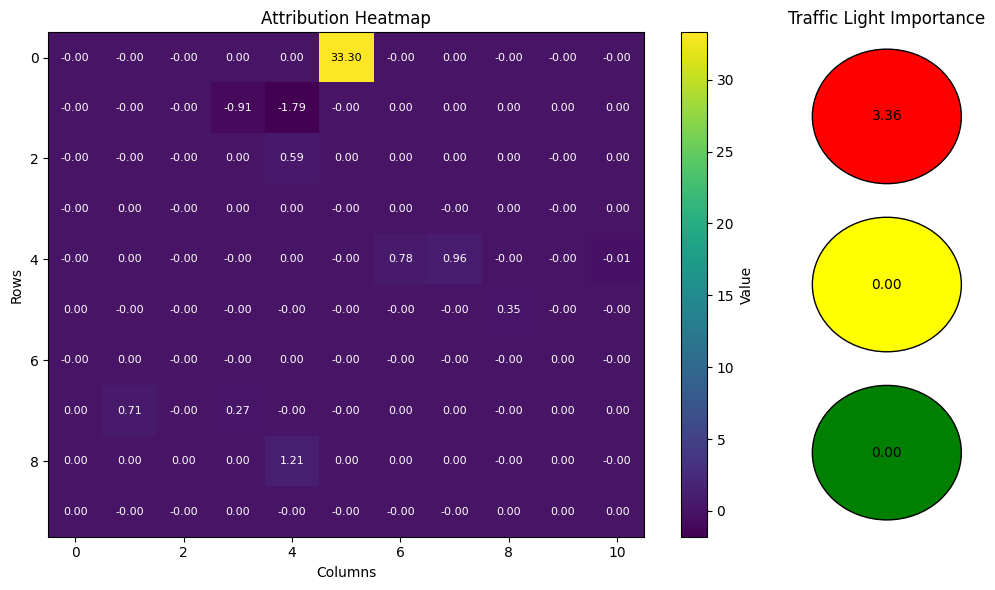

Evaluating hard
Agent's state has been loaded from ../../checkpoints/final_dqn/hard.pt


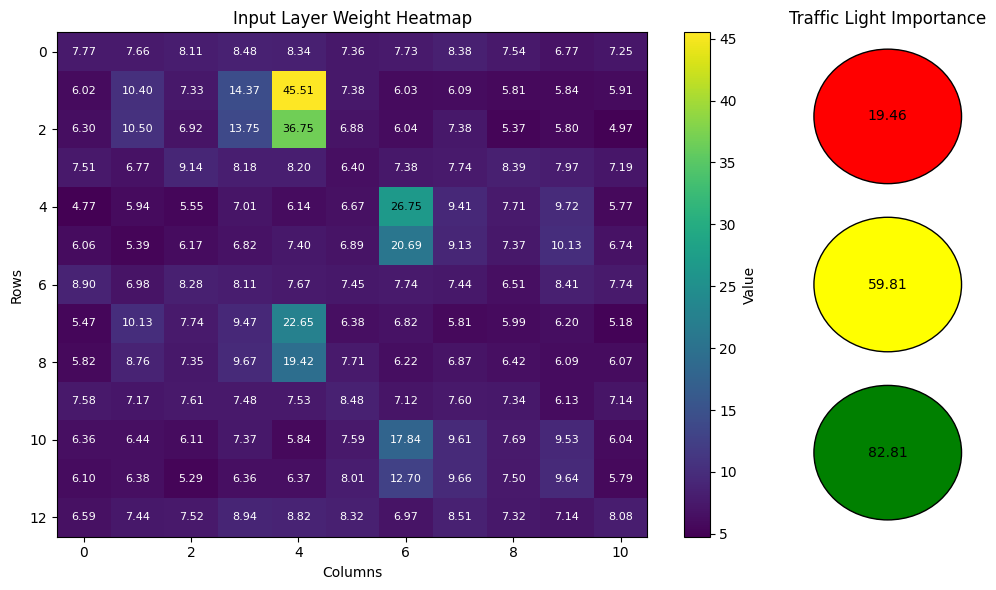

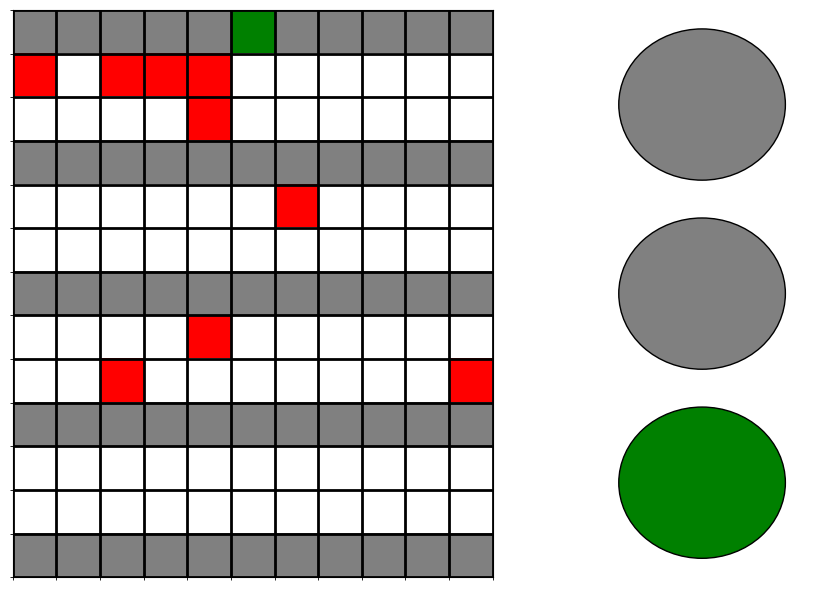

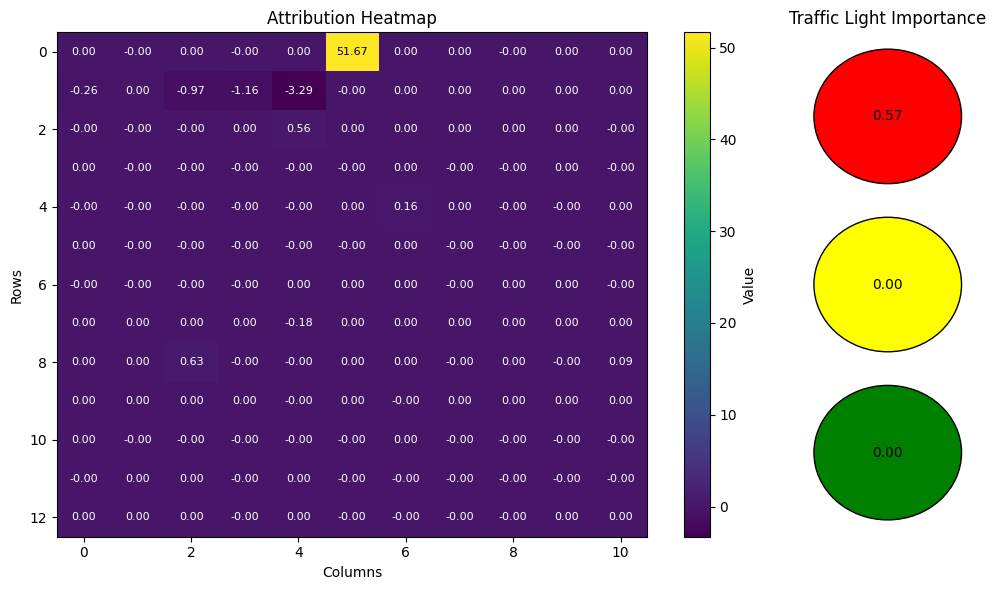

In [7]:
from src.agents.dqn import DQNAgent
from src.interpretability import plot_input_layer_weights, plot_weight_attribution
import torch


for env_type, env in zip(["easy", "medium", "hard"], [easy_env, medium_env, hard_env]):
    print(f"Evaluating {env_type}")

    train_parameters = {
        "state_dim": env.grid_shape[0] * env.grid_shape[1] + 3,
        "action_dim": 3,
        "action_space": [0, 1, 2],
        "num_layers": 4,
        "hidden_dim": 64,
        "gamma": 0.99,
        "total_training_time_step": 1000_000,
        "epsilon_start_value": 1.0,
        "epsilon_end_value": 0.05,
        "epsilon_duration": 250000,
        "replay_buffer_size": 125_000,
        "start_training_step": 500,
        "freq_update_behavior_policy": 4,
        "freq_update_target_policy": 10_000,
        "batch_size": 32,
        "learning_rate": 1e-4,
        "model_name": None,
        "device": "cpu",
        "replay_buffer_prepopulate_size": 50000,
        "scheduler_type": "linear",
    }

    agent = DQNAgent(env, train_parameters)
    agent.load(f"../../checkpoints/final_dqn/{env_type}.pt")

    plot_input_layer_weights(
        agent.behavior_policy_net,
        env.grid_shape[0],
        env.grid_shape[1],
    )

    state, _ = env.reset()
    state_tensor = torch.tensor(agent.transform_state(state)).float().view(1, -1)
    env.render(mode="human")

    plot_weight_attribution(
        agent.behavior_policy_net,
        state_tensor,
        rows=env.grid_shape[0],
        cols=env.grid_shape[1],
    )